In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import scipy.stats

### 결측치, ozone의 이상치가 제거된 데이터셋 수집

In [8]:
train = pd.read_csv('data/train_ozone.csv')
test = pd.read_csv('data/test_ozone.csv')
submission = pd.read_csv('data/submission.csv')

In [9]:
train.shape, test.shape, submission.shape

((1459, 11), (715, 10), (715, 2))

<AxesSubplot:>

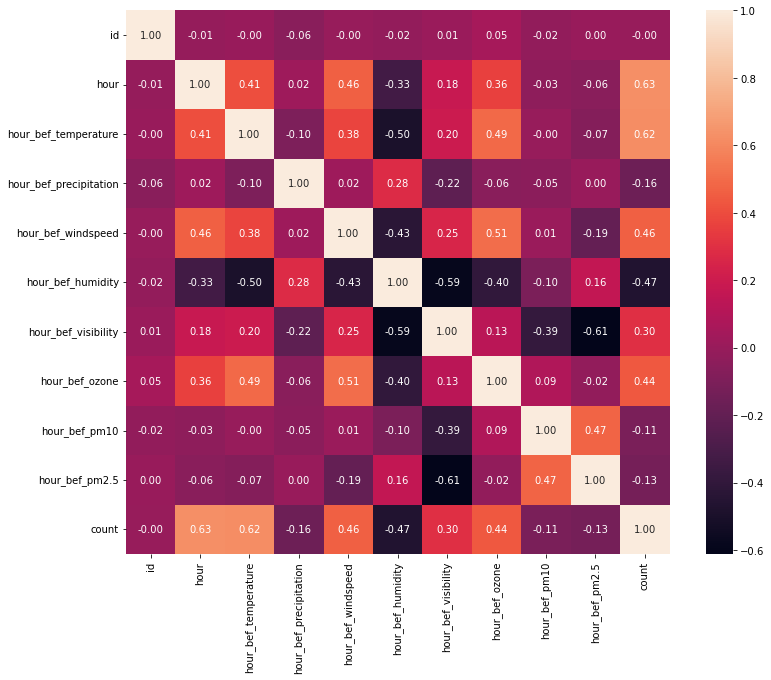

In [10]:
train_corr = train.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(train_corr, annot=True, fmt = '.2f', square=True)

<AxesSubplot:xlabel='hour_bef_pm2.5', ylabel='count'>

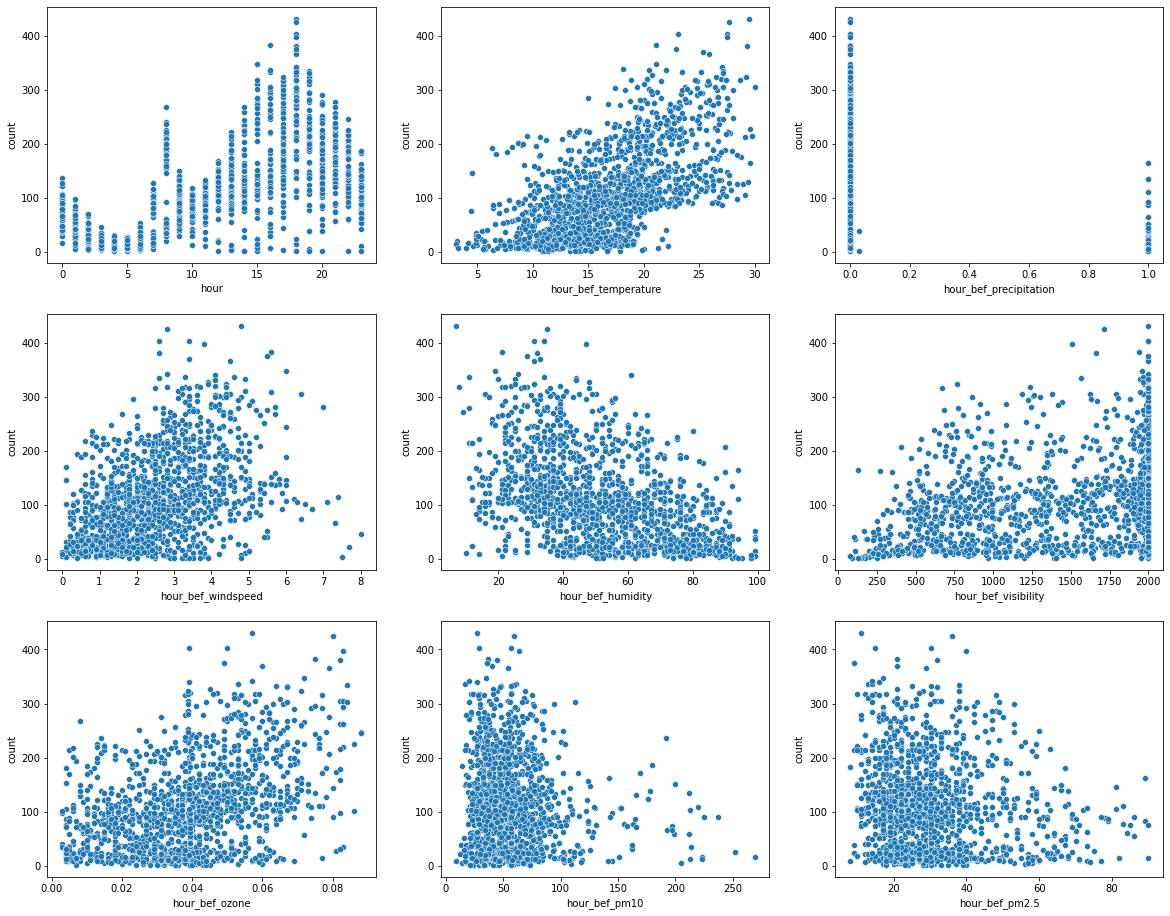

In [11]:
cat_columns = ["hour", "hour_bef_temperature", "hour_bef_precipitation", "hour_bef_windspeed", "hour_bef_humidity",
               "hour_bef_visibility", "hour_bef_ozone", "hour_bef_pm10", "hour_bef_pm2.5"]

figure, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 16))

sns.scatterplot(data = train, x = 'hour', y = 'count', ax = axes[0][0])
sns.scatterplot(data = train, x = 'hour_bef_temperature', y = 'count', ax = axes[0][1])
sns.scatterplot(data = train, x = 'hour_bef_precipitation', y = 'count', ax = axes[0][2])
sns.scatterplot(data = train, x = 'hour_bef_windspeed', y = 'count', ax = axes[1][0])
sns.scatterplot(data = train, x = 'hour_bef_humidity', y = 'count', ax = axes[1][1])
sns.scatterplot(data = train, x = 'hour_bef_visibility', y = 'count', ax = axes[1][2])
sns.scatterplot(data = train, x = 'hour_bef_ozone', y = 'count', ax = axes[2][0])
sns.scatterplot(data = train, x = 'hour_bef_pm10', y = 'count', ax = axes[2][1])
sns.scatterplot(data = train, x = 'hour_bef_pm2.5', y = 'count', ax = axes[2][2])

<AxesSubplot:xlabel='hour_bef_pm2.5', ylabel='Density'>

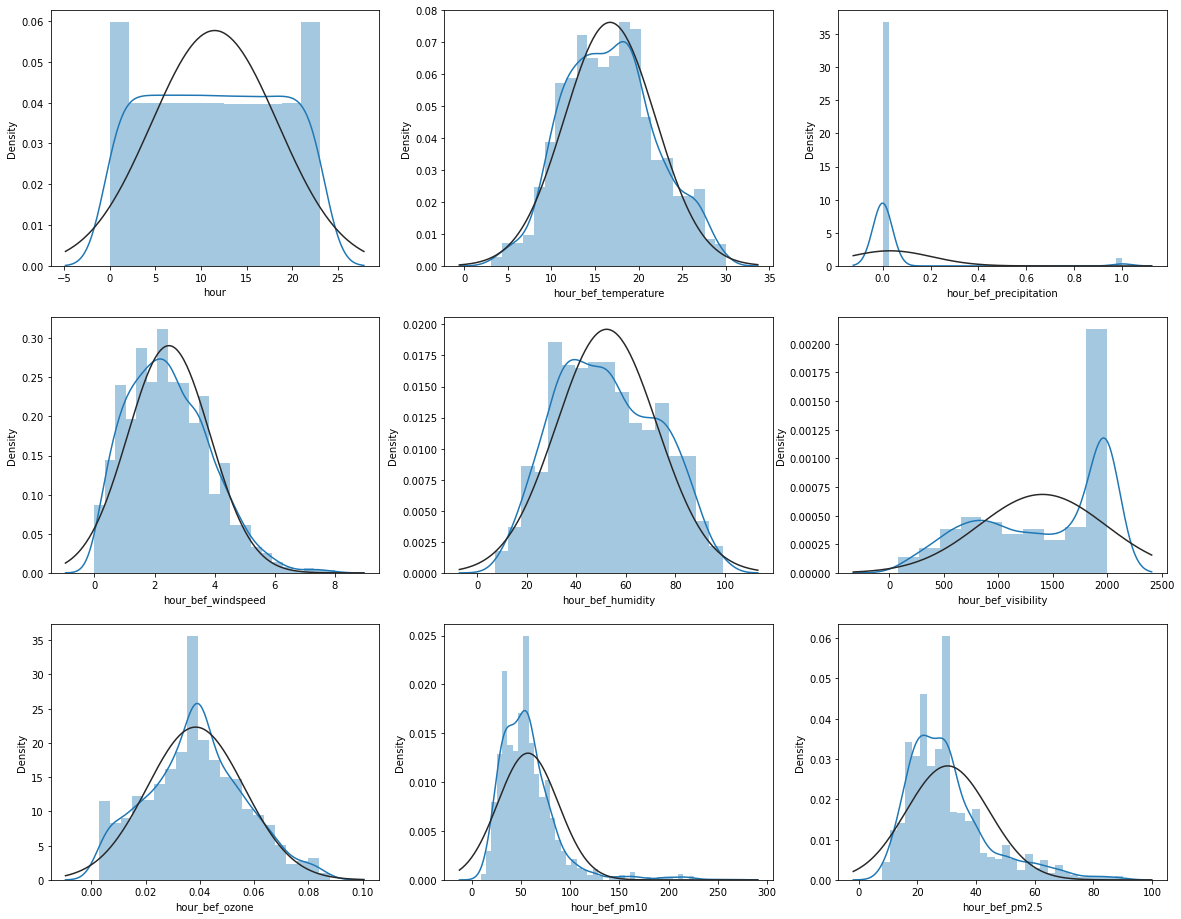

In [16]:
l/*cat_columns = ["hour", "hour_bef_temperature", "hour_bef_precipitation", "hour_bef_windspeed", "hour_bef_humidity",
               "hour_bef_visibility", "hour_bef_ozone", "hour_bef_pm10", "hour_bef_pm2.5"]

figure, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 16))

sns.distplot(train['hour'], fit=norm, ax = axes[0][0])
sns.distplot(train['hour_bef_temperature'], fit=norm, ax = axes[0][1])o*
sns.distplot(train['hour_bef_precipitation'], fit=norm, ax = axes[0][2])
sns.distplot(train['hour_bef_windspeed'], fit=norm, ax = axes[1][0])
sns.distplot(train['hour_bef_humidity'], fit=norm, ax = axes[1][1])
sns.distplot(train['hour_bef_visibility'], fit=norm, ax = axes[1][2])
sns.distplot(train['hour_bef_ozone'], fit=norm, ax = axes[2][0])
sns.distplot(train['hour_bef_pm10'], fit=norm, ax = axes[2][1])
sns.distplot(train['hour_bef_pm2.5'], fit=norm, ax = axes[2][2])

- 중앙값과 평균값이 비슷하고 좌우의 꼬리의 길이(데이터의 분포)가 비슷하면 정규분포를 다르는 것이다.

- 표준화 정규화는 기본적으로 해주는 거지만, 결정트리에는 효과가 미약하거나 없을 수 있음
- 로그 변환은 꼬리가 긴 것에 해줘야 한다.

### 로그 변환 대상
- hour_bef_visibility
- pm10
- pm2.5

## train set 로그 변환

In [62]:
#applying log transformation
train['hour_bef_visibility'] = np.log(train['hour_bef_visibility'])

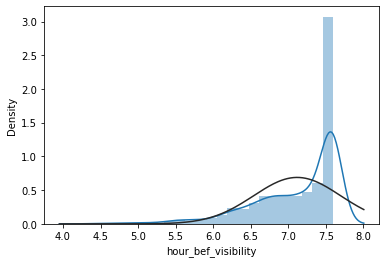

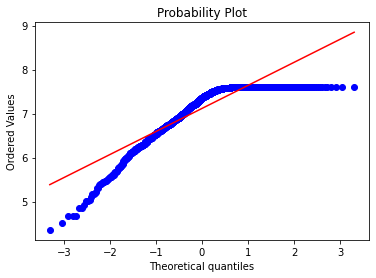

In [63]:
#transformed histogram and normal probability plot
sns.distplot(train['hour_bef_visibility'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['hour_bef_visibility'], plot=plt)

In [65]:
#applying log transformation
train['hour_bef_pm10'] = np.log(train['hour_bef_pm10'])

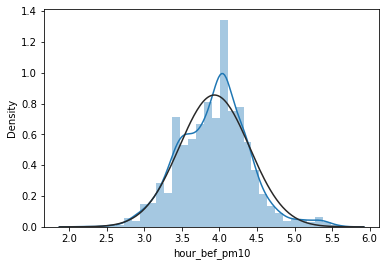

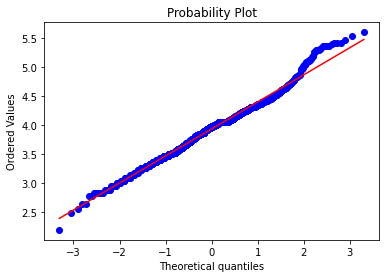

In [66]:
#transformed histogram and normal probability plot
sns.distplot(train['hour_bef_pm10'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['hour_bef_pm10'], plot=plt)

In [70]:
#applying log transformation
train['hour_bef_pm2.5'] = np.log(train['hour_bef_pm2.5'])

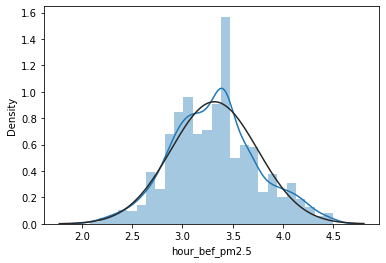

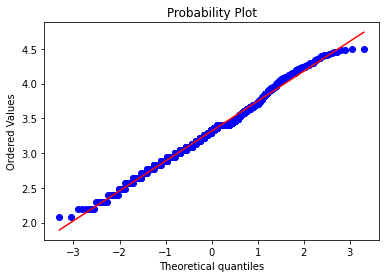

In [71]:
#transformed histogram and normal probability plot
sns.distplot(train['hour_bef_pm2.5'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['hour_bef_pm2.5'], plot=plt)

## test set도 로그 변환

In [74]:
#applying log transformation
test['hour_bef_visibility'] = np.log(test['hour_bef_visibility'])

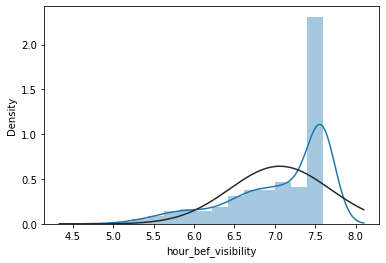

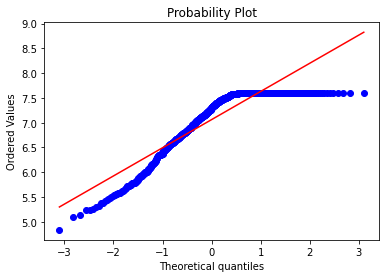

In [75]:
#transformed histogram and normal probability plot
sns.distplot(test['hour_bef_visibility'], fit=norm);
fig = plt.figure()
res = stats.probplot(test['hour_bef_visibility'], plot=plt)

In [76]:
#applying log transformation
test['hour_bef_pm10'] = np.log(test['hour_bef_pm10'])

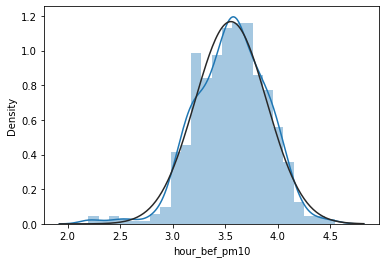

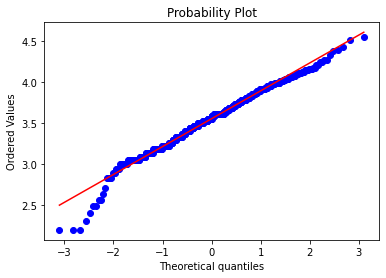

In [77]:
#transformed histogram and normal probability plot
sns.distplot(test['hour_bef_pm10'], fit=norm);
fig = plt.figure()
res = stats.probplot(test['hour_bef_pm10'], plot=plt)

In [78]:
#applying log transformation
test['hour_bef_pm2.5'] = np.log(test['hour_bef_pm2.5'])

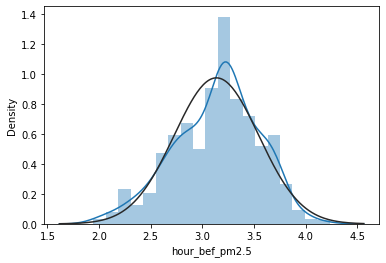

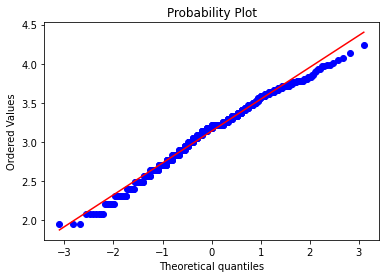

In [79]:
#transformed histogram and normal probability plot
sns.distplot(test['hour_bef_pm2.5'], fit=norm);
fig = plt.figure()
res = stats.probplot(test['hour_bef_pm2.5'], plot=plt)

In [80]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility', 
            'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']
X_train = train[features]
y_train = train['count']
X_test = test[features]

In [81]:
print(X_train.shape)
print(y_train.shape)
print(X_train.shape)

(1459, 9)
(1459,)
(1459, 9)


In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [84]:
model100 = RandomForestRegressor(n_estimators = 100, random_state = 0)

model100.fit(X_train, y_train)

ypred1 = model100.predict(X_test)

In [85]:
submission['count'] = ypred1
submission.to_csv("log-transformaion.csv", index = False)